In [9]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pylab as plt
import vision.sim_tools.connectors.kernel_connectors as kconn
import vision.sim_tools.connectors.mapping_funcs as mapfun
from vision.spike_tools.vis import my_imshow
from vision.sim_tools.vis import plot_connector_3d
import vision.sim_tools.kernels.center_surround as csgen
import vision.sim_tools.kernels.gabor as gabgen

from mpl_toolkits.mplot3d import axes3d, Axes3D

In [10]:
imgw = 4
imgh = 4
half_imgw = imgw//2
half_imgh = imgh//2

kernel_w = 3
std_dev = 0.8
sd_mult = 6.7

freq = 5.
pi_divs = 7
pi_frac = np.pi/float(pi_divs)
gk = gabgen.multi_gabor(kernel_w, [i*pi_frac for i in range(pi_divs)],
                        std_dev, freq)
csk = csgen.center_surround_kernel(kernel_w, std_dev, sd_mult)

print(csk)

[[-0.0974718  -0.13784594 -0.0974718 ]
 [-0.13784594  0.94127094 -0.13784594]
 [-0.0974718  -0.13784594 -0.0974718 ]]


In [38]:
rci = ""
for row in range(imgh):
    for col in range(imgw):
        rci += "(%02d, %02d, %02d)=(%04d)\t"%(row, col, row*imgw+col, mapfun.row_col_to_input(row, col, True, 2) )
    rci += "\n"
print(rci)
rci = ""
for row in range(imgh):
    for col in range(imgw):
        rci += "(%02d, %02d, %02d)=(%04d)\t"%(row, col, row*imgw+col, mapfun.row_col_to_input(row, col, False, 2) )
    rci += "\n"
print(rci)

(00, 00, 00)=(0001)	(00, 01, 01)=(0009)	(00, 02, 02)=(0017)	(00, 03, 03)=(0025)	
(01, 00, 04)=(0003)	(01, 01, 05)=(0011)	(01, 02, 06)=(0019)	(01, 03, 07)=(0027)	
(02, 00, 08)=(0005)	(02, 01, 09)=(0013)	(02, 02, 10)=(0021)	(02, 03, 11)=(0029)	
(03, 00, 12)=(0007)	(03, 01, 13)=(0015)	(03, 02, 14)=(0023)	(03, 03, 15)=(0031)	

(00, 00, 00)=(0000)	(00, 01, 01)=(0008)	(00, 02, 02)=(0016)	(00, 03, 03)=(0024)	
(01, 00, 04)=(0002)	(01, 01, 05)=(0010)	(01, 02, 06)=(0018)	(01, 03, 07)=(0026)	
(02, 00, 08)=(0004)	(02, 01, 09)=(0012)	(02, 02, 10)=(0020)	(02, 03, 11)=(0028)	
(03, 00, 12)=(0006)	(03, 01, 13)=(0014)	(03, 02, 14)=(0022)	(03, 03, 15)=(0030)	



In [39]:
colstep=1
rowstep=1
col_start=0
row_start=0
cs_cons = kconn.full_kernel_connector(imgw, imgh, csk, 
                                      col_step=colstep, row_step=rowstep,
                                      col_start=col_start, 
                                      row_start=row_start,
                                      row_bits=2,
                                      on_path=False)
for cnn in cs_cons[0]:
    if cnn[1] == 5: print(cnn) 
for cnn in cs_cons[1]:
    if cnn[1] == 5: print(cnn) 
# for c in cs_cons[0]:
#     print(c)

# gk_cons = []
# for gki in gk:
#     gk_cons.append( kconn.full_kernel_connector(imgw, imgh, gki, 
#                                                 col_step=colstep, 
#                                                 row_step=rowstep,
#                                                 col_start=col_start, 
#                                                 row_start=row_start) )

(10, 5, 0.9412709410709986, 2.0)
(0, 5, -0.0974717974148235, 1.0)
(8, 5, -0.13784593785292618, 1.0)
(16, 5, -0.0974717974148235, 1.0)
(2, 5, -0.13784593785292618, 1.0)
(18, 5, -0.13784593785292618, 1.0)
(4, 5, -0.0974717974148235, 1.0)
(12, 5, -0.13784593785292618, 1.0)
(20, 5, -0.0974717974148235, 1.0)


IndexError: index 16 is out of bounds for axis 0 with size 16

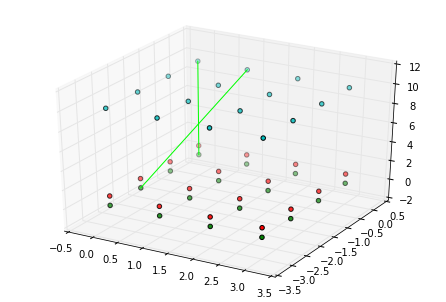

In [40]:
fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig)
plot_connector_3d(ax, imgw, imgh, cs_cons, col_start, row_start, 
                  colstep, rowstep)
plt.show()


In [6]:
for gk_c in gk_cons:
    fig = plt.figure()
    # ax = fig.add_subplot(111, projection='3d')
    ax = Axes3D(fig)
    plot_connector_3d(ax, imgw, imgh, gk_c, col_start, row_start, 
                      colstep, rowstep)
    plt.show()